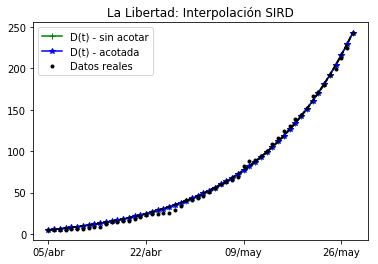

In [3]:
import numpy as np
import matplotlib.pyplot as pl
from scipy import integrate, optimize
from matplotlib.pyplot import figure

datos = np.loadtxt("La_libertad_I_R_F_2.txt")
DATOS = np.matrix(datos)
p_ll = 2016771
p = p_ll

def sird_model(y, x, beta, gamma, delta):
    #gamma = 1/18
    S = -beta * y[0] * y[1] / N
    R = gamma * y[1]
    D = delta * y[1]
    I = -(S + R + D)
    return S, I, R, D

def fit_odeint(x, beta, gamma, delta): #SUSCEPTIBLE
    return integrate.odeint(sird_model, (S0, I0, R0, D0), x, args=(beta, gamma, delta))[:,0]

def fit_odeint1(x, beta, gamma, delta): #INFECTADO
    return integrate.odeint(sird_model, (S0, I0, R0, D0), x, args=(beta, gamma, delta))[:,1]

def fit_odeint2(x, beta, gamma, delta): #RECUPERADO
    return integrate.odeint(sird_model, (S0, I0, R0, D0), x, args=(beta, gamma, delta))[:,2]

def fit_odeint3(x, beta, gamma, delta): #FALLECIDO
    return integrate.odeint(sird_model, (S0, I0, R0, D0), x, args=(beta, gamma, delta))[:,3]

infec = (datos[:,0])
recu = (datos[:,1]) 
falle = datos[:,2]
xdata = []
for i in range(0,int(len(infec))):
    xdata.append(i)
    
infec = np.array(infec, dtype=float)
recu  = np.array(recu , dtype=float)
falle = np.array(falle, dtype=float)
xdata = np.array(xdata, dtype=float)

N  = p
I0 = infec[0]
R0 = recu[0]
D0 = falle[0]
S0 = N - I0 - R0 - D0

sigma2 = np.ones(len(xdata))
sigma2[[0, -1]] = 0.01
#popt, pcov = optimize.curve_fit(fit_odeint3, xdata, falle,sigma = sigma2,bounds=([1.5/21, 1/21 ,  0.0007 ], [1.5/7, 1/7,0.02]))
#popt, pcov = optimize.curve_fit(fit_odeint3, xdata, falle,bounds=([1.5/21, 1/21 ,  0.0007 ], [1.5/7, 1/7,0.02]))
popt, pcov = optimize.curve_fit(fit_odeint3, xdata, falle,sigma = sigma2,bounds=(0., [1.,1.,1.]))
#popt, pcov = optimize.curve_fit(fit_odeint3, xdata, falle,sigma = sigma2,bounds=([1.5/21, 0.089 ,  0.0007 ], [1.5/7, 0.230,0.02]))

xdata = []
for i in range(0,int(len(infec)*1)):
    xdata.append(i+1)
    
I = fit_odeint1(xdata, *popt)
R = fit_odeint2(xdata, *popt)
D = fit_odeint3(xdata, *popt)
D2 = fit_odeint3(xdata, 0.60055418, 0.52414127, 0.01832159)
D_b = fit_odeint3(xdata, 0.60055418, 0.52414127, 0.01815028)
D_a = fit_odeint3(xdata, 0.60055418, 0.52414127, 0.01849291)
q = line[0:54]

#print(popt, popt[0]/(popt[1] + popt[2]))
#print(pcov)

pl.plot(q, D,'g-+', label = "D(t) - sin acotar")
pl.plot(q, D2,'b-*', label = "D(t) - acotada")
pl.plot(q,D_b,'k--')
pl.plot(q,D_a,'k--')
pl.plot(falle, 'k.', label = "Datos reales")
pl.title('La Libertad: Interpolación SIRD')

#ax.legend(bbox_to_anchor=(1.1, 1.05))
#pl.legend(loc = 'center left',bbox_to_anchor=(0., 1.))
pl.xticks(range(0,len(q),17))
pl.legend()

#pl.savefig('In_SIRD_LL.jpg',dpi = 300)

In [21]:
#H = (integrate.odeint(sird_model, (S0, I0, R0, D0), xdata, args=(0.60055418, 0.52414127, 0.01849291)))

H = (integrate.odeint(sird_model, (S0, I0, R0, D0), xdata, args=(0.21428571 ,0.1383443, 0.01856123)))

np.savetxt('Acotado.txt',H,fmt='%.2f')

In [54]:
pcov

array([[3.00117226e-04, 3.29535555e-04, 8.38109953e-06],
       [3.29535555e-04, 3.61882784e-04, 9.29247835e-06],
       [8.38109953e-06, 9.29247835e-06, 4.12549270e-07]])

In [168]:
#OBTENCIÓN DEL INTERVALO DE CONFIANZA AL 95%
# 1.96 es el valor de la dstribución de probabilidad asignado para 95%
perr = np.sqrt(np.diag(pcov)) #Sin Cota

p = 1.96*perr/(np.sqrt(len(falle)))
A = popt - p
B = popt + p
print(A)
print(popt)
print(B)

[0.59593352 0.51906736 0.01815028]
[0.60055418 0.52414127 0.01832159]
[0.60517485 0.52921519 0.01849291]


In [21]:
popt

array([0.21428509, 0.13834368, 0.01856123])

In [5]:
#OBTENCIÓN DEL INTERVALO DE CONFIANZA AL 95%
# 1.96 es el valor de la dstribución de probabilidad asignado para 95%

perr = np.sqrt(np.diag(pcov)) #Con Cota

p = 1.96*perr/(np.sqrt(len(falle)))
A = popt - p
B = popt + p
print(A)
print(popt)
print(B)

[-0.94059291 -1.01754617  0.01459081]
[0.21428571 0.13638407 0.015     ]
[1.36916434 1.29031431 0.01540919]


05/04 hasta 28/05

# Sin cota 

[0.60055418 0.52414127 0.01832159] 1.1070880942778902

Intervalo de confianza al 95%
- beta  0.60055418 (0.59593352 - 0.60517485)
- gamma 0.52414127 (0.51906736 - 0.52921519)
- delta 0.01832159 (0.01815028 - 0.01849291)


# Con cota

[0.21428571 0.1383443  0.01856123] 1.3656989221257716

Intervalo de confianza al 95%
- beta  0.21428571 (-0.62561658 - 1.05418801)
- gamma 0.13834418 (-0.70101846 - 0.97770682)
- delta 0.01856111 ( 0.01827324 - 0.01884898)

In [2]:
file = open("fechas.txt")

line = file.read().split('\n')
file.close()

np.shape(line)

(270,)

05 de abril 54 28 de Mayo 189


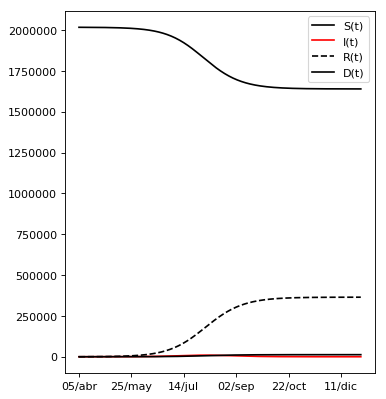

In [16]:
#SIN COTA

figure(num=None, figsize=(5, 6), dpi=80, facecolor='w', edgecolor='k')



datos2 = np.loadtxt("La_libertad_I_R_F_2.txt")

infec2 = datos2[:,0]
recu2  = datos2[:,1]
falle2 = datos2[:,2]

xdata = []
for i in range(0,int(len(infec)*5)):
    xdata.append(i+1)
    
S = fit_odeint(xdata, 0.60055418, 0.52414127, 0.01832159)
I = fit_odeint1(xdata, 0.60055418, 0.52414127, 0.01832159)
R = fit_odeint2(xdata, 0.60055418, 0.52414127, 0.01832159)
D = fit_odeint3(xdata, 0.60055418, 0.52414127, 0.01832159)


print("05 de abril",len(falle2),"28 de Mayo", int(len(infec)*3.5))


pl.plot(S     , 'k-' , label = "S(t)")
pl.plot(line, I     , 'r' , label = "I(t)")
pl.plot(R     , 'k--' , label = "R(t)")
pl.plot(D     , 'k' , label = "D(t)")


pl.legend(loc = 0)
pl.xticks(range(0,len(line),50))

pl.savefig('Ex_SIRD_LL_no_acotado_full.jpg',dpi = 320,bbox_inches='tight')

05 de abril 54 28 de Mayo 189


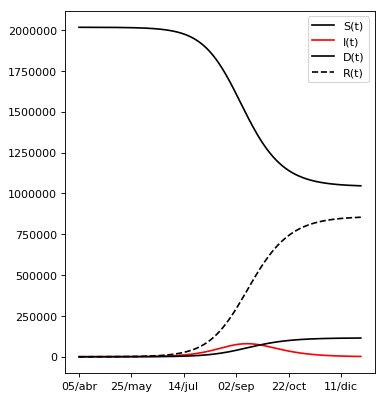

In [34]:
#CON COTA
figure(num=None, figsize=(5, 6), dpi=80, facecolor='w', edgecolor='k')
datos2 = np.loadtxt("La_libertad_I_R_F_2.txt")

infec2 = datos2[:,0]
recu2  = datos2[:,1]
falle2 = datos2[:,2]

xdata = []
for i in range(0,int(len(infec)*5)):
    xdata.append(i+1)
    

D2 = fit_odeint3(xdata, 0.2143, 0.1383, 0.01856)
S2 = fit_odeint(xdata, 0.2143, 0.1383, 0.01856)
I2 = fit_odeint1(xdata, 0.2143, 0.1383, 0.01856)
R2 = fit_odeint2(xdata, 0.2143, 0.1383, 0.01856)
print("05 de abril",len(falle2),"28 de Mayo", int(len(infec)*3.5))

pl.plot(S2     , 'k' , label = "S(t)")
pl.plot(line,I2     , 'r' , label = "I(t)")
pl.plot(D2     , 'k' , label = "D(t)")
pl.plot(R2     , 'k--' , label = "R(t)")

pl.xticks(range(0,len(line),50))

#pl.title('La Libertad: Extrapolación SIRD')
pl.legend(loc = 0)
pl.savefig('Ex_SIRD_LL_acotado_full.jpg',dpi = 300,bbox_inches='tight')

05 de abril 54 28 de Mayo 189


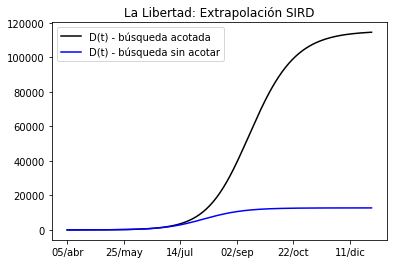

In [179]:
datos2 = np.loadtxt("La_libertad_I_R_F_2.txt")

infec2 = datos2[:,0]
recu2  = datos2[:,1]
falle2 = datos2[:,2]

xdata = []
for i in range(0,int(len(infec)*5)):
    xdata.append(i+1)
    

D = fit_odeint3(xdata, 0.60055418, 0.52414127, 0.01832159)
D2 = fit_odeint3(xdata, 0.21428547 ,0.13834406, 0.01856123)
print("05 de abril",len(falle2),"28 de Mayo", int(len(infec)*3.5))

pl.plot(line, D2     , 'k' , label = "D(t) - búsqueda acotada")
pl.plot(D     , 'b' , label = "D(t) - búsqueda sin acotar")

#pl.plot(falle2, 'k.', label = "Datos reales")
pl.title('La Libertad: Extrapolación SIRD')
pl.xticks(range(0,len(line),50))
pl.legend(loc = 0)
#pl.savefig('Ex_SIRD_LL_fallecdos.jpg',dpi = 300)

In [194]:
actual = np.array([264,284,301,313,324,348,365,383,408])
p1 = D[54:63]
p2 = D2[54:63]
e1 = 100*(abs(p1-actual))/actual #Sin acotar
e2 = 100*(abs(p2-actual))/actual #Acotado
print(p1,p2)
print(e1)
print(e2)
print(np.mean(e1))
print(np.mean(e2))

[257.62737926 273.09112534 289.43675448 306.7118141  324.9660875
 344.25166034 364.62297991 386.13691681 408.85281557] [257.72353877 273.31144993 289.81442828 307.28583848 325.78211395
 345.36292889 366.09137896 388.03417032 411.26181912]
[2.41387149 3.84115305 3.84160981 2.00900508 0.29817515 1.0771091
 0.10329318 0.81903833 0.20902342]
[2.37744743 3.76357397 3.71613678 1.82561071 0.55003517 0.75777905
 0.29900794 1.31440478 0.79946547]
1.623586511967014
1.7114957007173617


In [45]:
print('Predicción al 06 de Junio ',D[53 + 9],'| Error al ',100*(D[53 + 9]-408)/408,'% |', "Valor real 404")

Predicción al 06 de Junio  467.69753552099365 | Error al  14.631748902204327 % | Valor real 404


In [37]:
print('Predicción al 06 de Junio ',D[53 + 9],'| Error al ',100*(D[53 + 9]-408)/408,'% |', "Valor real 404")

Predicción al 06 de Junio  408.85281287731584 | Error al  0.20902276404800035 % | Valor real 404


Valor según el gobierno Regional al 06 de Junio: 404

https://twitter.com/GRLaLibertad/status/1269286077287841798/photo/1

53 28/05

54 29/05

55 30/05

56 31/05

57 01/06

58 02/06

59 03/06

60 04/06

61 05/06

62 06/06

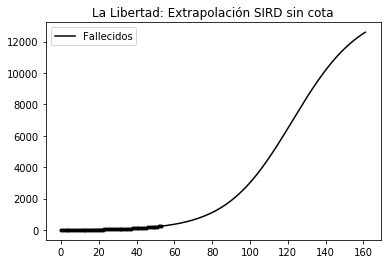

In [11]:
datos2 = np.loadtxt("La_libertad_I_R_F_2.txt")

infec2 = datos2[:,0]
recu2  = datos2[:,1]
falle2 = datos2[:,2]

xdata = []
for i in range(0,int(len(infec)*3)):
    xdata.append(i+1)
    
I = fit_odeint1(xdata, *popt)
R = fit_odeint2(xdata, *popt)
D = fit_odeint3(xdata, *popt)

#pl.plot(I     , 'r' , label = "Infectados")
#pl.plot(R     , 'g' , label = "Recuperados")
pl.plot(D     , 'k' , label = "Fallecidos")
#pl.plot(infec2, 'r.')
#pl.plot(recu2 , 'g.')
pl.plot(falle2, 'k.')
pl.title('La Libertad: Extrapolación SIRD sin cota')
pl.legend(loc = 0)
#pl.savefig('Ex_SIRD_LL_sin_cota.jpg')

# Sin cota:

[0.63854849 0.55757738 0.01528571] 1.1452195147517685

# Con cota:

[0.21428568 0.13374648 0.01539876] 1.6021780306920976

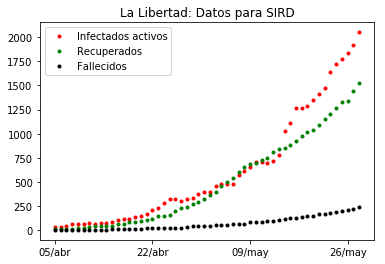

In [152]:
q = line[0:54]

pl.plot( q, infec2, 'r.', label = "Infectados activos")
pl.plot(recu2, 'g.', label = "Recuperados")
pl.plot(falle2, 'k.', label = "Fallecidos")
pl.title('La Libertad: Datos para SIRD')
pl.legend(loc = 0)
pl.xticks(range(0,len(q),17))
pl.savefig('Datos_SIRD_LL.jpg',dpi=300)